# **PBL 2: Redes Bayesianas** 

Equipo: 

* Álvaro David López  - A01570493
* Celinna Arellano  - A01730562
* Lolyna de la Fuente - A01194774
* Luis Gabriel Martínez - A01651812
* María del Carmen Vargas - A00828570

## Problematización

La diabetes es la segunda causa de muerte en el país, representando el 15.4% de las muertes en México. Este es un problema que ha prevalecido desde hace más de 15 años. En esta base de datos brindada por Kaggle, encontramos diferentes variantes que pueden estar relacionadas con la detección y diagnóstico de diabetes.  Por ejemplo, tenemos números de embarazos, glucosa, presión arterial, insulina, índice de masa muscular, edad, entre otros. Al final, tenemos una variable que se encarga de categorizar los casos como 1 ó 0 (1 siendo positivo en diabetes y 0 siendo negativo). 

## Enfoque

Se implementó un modelo probabilístico denominado como Redes Bayesianas. Este modelo bayesiano representa un papel muy importante para abordar la solución de esta problemática ya definida anteriormente, ya que además de que tiene una amplia gama de aplicaciones de la vida cotidiana, puede ayudar a mejorar la toma de decisiones dentro del campo del cuidado de la salud. Esto es debido a que puede calcular probabilidades en función de la ocurrencia de otros eventos, favoreciendo directamente en la predicción y diagnóstico de una posible enfermedad dados ciertos síntomas. Con esto en mente, a continuación se describen la serie de pasos que se llevaron a cabo dentro del presente cuaderno de Jupyter:

### Limpieza y exploración de los datos




*   Se importan las librerías a utilizar, entre ellas pandas, matplotlib, seaborn, numpy, etc. 


*   Se descarga el dataset de Kaggle con el que se trabajará: ‘diabetes-dataset.csv’ y se formatea a Data Frame.


*   Exploración de los datos: Se obtienen las dimensiones, se visualizan gráficas boxplot para observar los outliers para la variable ‘BMI’ e ‘Insulin’, y por último, se grafica un scatterplot entre ‘Insulin’ y ‘Glucose’. 


*   Se discretizan las variables ‘Glucose’, ‘BloodPressure’ y ‘BMI’, ya que solo representan un interés aquellos valores mayores de cero.


*   Se asigna una nueva columna con la variable ‘Overweight’, en donde los valores deben cumplir con la condición de un índice de masa corporal (BMI) mayor a 25.

*   Tomando en cuenta los cambios realizados dentro del data frame, se obtienen gráficas de barras y pie chart de la variable ‘Outcome’.  



### Implementación de la Red Bayesiana: 


1.   Fase de *training* y *testing* de los datos en donde separamos el 80% de estos hacía *training* y el 20% hacía *testing* de manera aleatoria para poder implementar de manera correcta el modelo probabilístico. 


2.   Creación de función *count values in range* y *normal prob* en donde se discretizan los datos y las probabilidades se van almacenando en listas y diccionarios.


3.   Creación de diccionario monty hall dictionary en donde cada llave es un nodo y el valor de cada llave es la lista de los padres de dicho nodo. 


4. Para este caso, el **primer nodo** contiene ‘Pregnancies’, ‘Age’, ‘DiabetesPedigreeFunction’ y ‘Overweight’. Se calculan sus probabilidades.

 El **segundo nodo** contiene las variables ‘SkinThickness’ y ‘BMI’ y se calculan las probabilidades con probabilidad condicional. 

 El **tercer nodo** contiene las variables ‘Glucose’, ‘Insulin’ y ‘BloodPressure’, implementado casi igual que en el segundo nodo. Se calculan sus probabilidades.


5. Creación de los nodos y sus correspondientes tablas de probabilidades condicionales.


6. Se establece el objeto bbn para graficar los nodos. Dentro de este se asignan qué objetos serán los nodos. 


7. Se crea otro objeto llamado join tree, el cual ayudará a calcular las probabilidades de algunos eventos dados cierta evidencia.


8. Creación de función print probs para imprimir las probabilidades marginales.


9. Creación de función potential to series que obtiene las probabilidades de los nodos.


10. Creación de función evidence con el propósito de que se puedan re-calcular las probabilidades para cada nodo de las Redes Bayesianas.


11. Se crea un diccionario de rangos de cuartiles para cada variable del Data Frame, utilizando los datos encapsulados en el training set.


12. Creación de función get quartile y predict diabetes. En predict diabetes se hace uso de get quartile y evidence para realizar la predicción y generar el nodo de ‘Outcome’. Además, aquí es en donde se aplica el ***Modelo Probabilístico** con p asignado a 0.2.


13. Adicional a esto, se crea una columna ‘Prediction’, en la cual con el uso de un for se van asignando las predicciones correspondientes.


14. Se evalúa el modelo con las métricas confusion matrix, recall, accuracy, precision y F1 score.

## Propósito

El propósito de este trabajo es ser capaces de categorizar y predecir si un paciente con ciertas características puede o no tener diabetes.  Esto se busca conseguir mediante la implementación del método de redes bayesianas para la clasificación de los datos entre clases (éstas siendo 1= diagnóstico positivo, 0 = diagnóstico negativo).  Con ello, se incluye el deber de implementar los principios probabilísticos de la asociación entre variables aleatorias que se considera en el concepto del grafo probabilístico.


El propósito secundario de este reporte también es la demostración de una implementación de dichos principios en forma de código en el lenguaje de programación Python. Esto es, utilizando una serie de datos donde se tienen mediciones de condiciones y estados de pacientes, entre ellas  la métrica de presencia de diabetes para cada paciente. 


## Información

Las redes bayesianas son un tipo de modelo probabilístico gráfico que usa inferencia bayesiana para los cálculos de probabilidad. Su objetivo es modelar la dependencia condicional y, por consiguiente, la causalidad, al representar dependencia condicional en las aristas en un gráfico direccionado. Con este tipo de modelos podemos predecir, clasificar, diagnosticar, entre otras aplicaciones. Lo más importante es observar el comportamiento de las variables del dominio. 

Dentro de la implementación llevada a cabo para obtener y clasificar el ‘Outcome’ correspondiente de las predicciones finales, se aplicó el **Modelo Probabilístico**. Este consiste primeramente en asignar un valor determinado a un threshold “p” (a disposición de quién lo ejecuta), y establecer una condición en la que, para este caso, si la probabilidad de que la persona padezca diabetes es mayor al threshold p, entonces la predicción se le clasifica como “1”, es decir, que sí padece diabetes. En caso contrario, se clasifica como “0”: que no tiene diabetes. 

En términos más formales, a continuación se muestra la expresión que satisface el Modelo Probabilístico: 


$$
\begin{align}
P(spam|w_1\cap w_2\cap\cdots\cap w_n) > p.
\end{align}
$$


## Razonamiento

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('diabetes-dataset.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [ ]:
df.shape

(2000, 9)

#### Limpieza de los datos

{'boxes': [<matplotlib.lines.Line2D at 0x7f74ee29a710>],
 'caps': [<matplotlib.lines.Line2D at 0x7f74ee2638d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f74ec9abb10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f74ec9ab5d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f74ee201c90>,
  <matplotlib.lines.Line2D at 0x7f74ee27ca50>]}

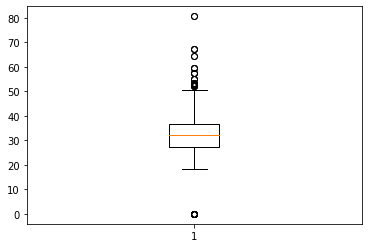

In [ ]:
plt.boxplot(df["BMI"])

In [ ]:
df[df["BMI"] == 0].shape

(28, 9)

{'boxes': [<matplotlib.lines.Line2D at 0x7f74ec98cb10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f74ec992ad0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f74ec99ab10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f74ec99a5d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f74ec977ed0>,
  <matplotlib.lines.Line2D at 0x7f74ec992590>]}

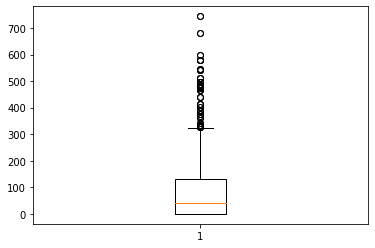

In [ ]:
plt.boxplot(df["Insulin"])

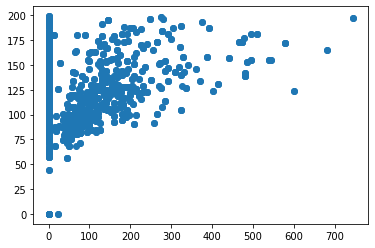

In [ ]:
plt.scatter(df["Insulin"], df["Glucose"])

In [ ]:
df = df[df["Glucose"] > 0]
df = df[df["BloodPressure"] > 0]
df = df[df["BMI"] > 0]
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
5,0,173,78,32,265,46.5,1.159,58,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [ ]:
df.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,2,138,62,35,0,33.6,0.127,47,1
1,1,0,84,82,31,125,38.2,0.233,23,0
2,3,0,135,68,42,250,42.3,0.365,24,1
3,4,1,139,62,41,480,40.7,0.536,21,0
4,5,0,173,78,32,265,46.5,1.159,58,0
...,...,...,...,...,...,...,...,...,...,...
1883,1995,2,75,64,24,55,29.7,0.370,33,0
1884,1996,8,179,72,42,130,32.7,0.719,36,1
1885,1997,6,85,78,0,0,31.2,0.382,42,0
1886,1998,0,129,110,46,130,67.1,0.319,26,1


In [ ]:
df["Overweight"] = np.where(df["BMI"] >= 25, 1, 0)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Overweight
0,2,138,62,35,0,33.6,0.127,47,1,1
1,0,84,82,31,125,38.2,0.233,23,0,1
3,0,135,68,42,250,42.3,0.365,24,1,1
4,1,139,62,41,480,40.7,0.536,21,0,1
5,0,173,78,32,265,46.5,1.159,58,0,1
...,...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0,1
1996,8,179,72,42,130,32.7,0.719,36,1,1
1997,6,85,78,0,0,31.2,0.382,42,0,1
1998,0,129,110,46,130,67.1,0.319,26,1,1


<Figure size 720x720 with 0 Axes>

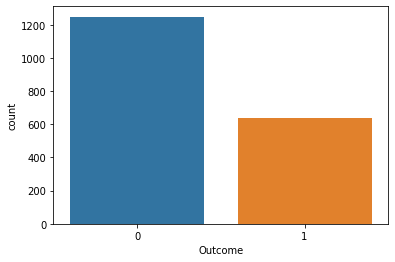

<Figure size 720x720 with 0 Axes>

In [ ]:
x = df.Outcome.value_counts()
sns.countplot(x = "Outcome", data = df)

plt.figure(figsize=(10,10))

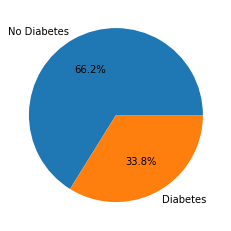

In [ ]:
labels = ["No Diabetes","Diabetes"]

plt.pie(x.values, labels= labels, autopct= "%1.1f%%") # visualizing using pie
plt.show()   

# Creación de la red Bayesiana

In [ ]:
#Generamos dos sets, uno para la fase de entrenamiento y otro para la fase de prueba
np.random.seed(298347) 
number_of_rows = df.shape[0]
index_train = np.random.choice(range(number_of_rows), int(0.8 * number_of_rows), replace=False)
index_test = np.asarray(list(set(range(number_of_rows)) - set(index_train)))
train_set = df.iloc[index_train] 
test_set = df.iloc[index_test] 
print(train_set.shape)
print(test_set.shape)
train_set

(1510, 10)
(378, 10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Overweight
1724,5,104,74,0,0,28.8,0.153,48,0,1
546,5,187,76,27,207,43.6,1.034,53,1,1
764,2,122,70,27,0,36.8,0.340,27,0,1
1681,0,135,94,46,145,40.6,0.284,26,0,1
1492,2,139,75,0,0,25.6,0.167,29,0,1
...,...,...,...,...,...,...,...,...,...,...
1118,1,199,76,43,0,42.9,1.394,22,1,1
662,8,167,106,46,231,37.6,0.165,43,1,1
142,2,108,52,26,63,32.5,0.318,22,0,1
1521,8,74,70,40,49,35.3,0.705,39,0,1


In [ ]:
#Importamos todas las librerías que vamos a usar para la red bayesiana
!pip install pybbn
import networkx as nx # for drawing graphs

# for creating Bayesian Belief Networks (BBN)
from pybbn.graph.dag import Bbn
from pybbn.graph.edge import Edge, EdgeType
from pybbn.graph.jointree import EvidenceBuilder
from pybbn.graph.node import BbnNode
from pybbn.graph.variable import Variable
from pybbn.pptc.inferencecontroller import InferenceController

In [ ]:
#Se discretizan los datos y se almacenan las probabilidades en listas y diccionarios
def count_values_in_range(data, ranges):
    range_counts = {}
    
    for r in ranges:
        range_counts["<="+str(r)] = 0
    range_counts[">"+str(ranges[-1])] = 0
    
    for i in data:
        if i <= ranges[0]:
            range_counts["<="+str(ranges[0])] += 1
        elif i <= ranges[1]:
            range_counts["<="+str(ranges[1])] += 1
        elif i <= ranges[2]:
            range_counts["<="+str(ranges[2])] += 1
        else:
            range_counts[">"+str(ranges[-1])] += 1
    
    return range_counts

In [ ]:
cols = ['Pregnancies', 'DiabetesPedigreeFunction', 'Age']
nums = {}
for col in cols:
    ranges = [train_set[col].describe().loc["25%"],train_set[col].describe().loc["50%"],train_set[col].describe().loc["75%"]]
    nums[col] = count_values_in_range(train_set[col],ranges)
nums

{'Age': {'<=24.0': 445, '<=29.0': 351, '<=40.0': 339, '>40.0': 375},
 'DiabetesPedigreeFunction': {'<=0.24100000000000002': 379,
  '<=0.37': 380,
  '<=0.61375': 373,
  '>0.61375': 378},
 'Pregnancies': {'<=1.0': 487, '<=3.0': 359, '<=6.0': 357, '>6.0': 307}}

In [ ]:
def normal_prob(nums):
    probs = []
    total = sum(nums.values())
    for v in nums.values():
        probs.append(v/total)
    return probs
        

In [ ]:
#Para los primeros nodos vamos a calcular probabilidad sencilla
monty_problem_dictionary = {
    'Pregnancies' : [],
    'Age' : [],
    'DiabetesPedigreeFunction' : [],
    'Overweight' : [],
    'Outcome' : ['Pregnancies', 'Age', 'DiabetesPedigreeFunction', 'Overweight'],
    'SkinThickness' : ['Overweight'],
    'BMI' : ['Overweight'],
    'Glucose' : ['Outcome'],
    'Insulin' : ['Outcome'],
    'BloodPressure' : ['Outcome', 'Overweight']
}

first_nodes = ['Pregnancies', 'Age', 'DiabetesPedigreeFunction', 'Overweight']
Pregnancies = normal_prob(nums['Pregnancies'])
Age = normal_prob(nums['Age'])
DiabetesPedigreeFunction = normal_prob(nums['DiabetesPedigreeFunction'])
Overweight = [len(train_set[train_set['Overweight'] == 0])/len(train_set['Overweight']), len(train_set[train_set['Overweight'] == 1])/len(train_set['Overweight'])]

In [ ]:
#Los siguientes nodos requieren de una fucnión diferente, ya que se van a calcular con probabilidad condicional
second_nodes = ["Outcome", "SkinThickness", "BMI"]
#Calculamos las probabilidades de Outcome usando probabilidad condicional
Diabetes = []

rangos_4 = ['25%','50%','75%','max']
rangos_2 = [0,1]

for p in range(4):
  for a in range(4):
    for dpf in range(4):
      for o in range(2):
        for diabetes in range(2):
          total_intersection = len(train_set[
                        (train_set["Pregnancies"] <= train_set['Pregnancies'].describe().loc[rangos_4[p]]) &
                        (train_set["Age"] <= train_set['Age'].describe().loc[rangos_4[a]]) &
                        (train_set["DiabetesPedigreeFunction"] <= train_set['DiabetesPedigreeFunction'].describe().loc[rangos_4[dpf]]) &
                        (train_set["Overweight"] == rangos_2[o]) &
                        (train_set["Outcome"] == rangos_2[diabetes])
          ])
          total_A = len(train_set[
                        (train_set["Pregnancies"] <= train_set['Pregnancies'].describe().loc[rangos_4[p]]) &
                        (train_set["Age"] <= train_set['Age'].describe().loc[rangos_4[a]]) &
                        (train_set["DiabetesPedigreeFunction"] <= train_set['DiabetesPedigreeFunction'].describe().loc[rangos_4[dpf]]) &
                        (train_set["Overweight"] == rangos_2[o])
          ])
          P_intersection = total_intersection/len(train_set)
          P_A = total_A/len(train_set)
          Diabetes.append(P_intersection/P_A)

Diabetes

[1.0,
 0.0,
 0.9268292682926829,
 0.07317073170731707,
 1.0,
 0.0,
 0.8461538461538463,
 0.15384615384615385,
 1.0,
 0.0,
 0.8352941176470587,
 0.16470588235294117,
 1.0,
 0.0,
 0.8202764976958525,
 0.17972350230414746,
 1.0,
 0.0,
 0.8928571428571428,
 0.10714285714285714,
 1.0,
 0.0,
 0.8032786885245902,
 0.19672131147540983,
 1.0,
 0.0,
 0.8200836820083681,
 0.1799163179916318,
 1.0,
 0.0,
 0.7707006369426751,
 0.22929936305732485,
 1.0,
 0.0,
 0.84375,
 0.15625,
 1.0,
 0.0,
 0.7272727272727273,
 0.2727272727272727,
 0.9705882352941178,
 0.029411764705882353,
 0.7680608365019012,
 0.23193916349809884,
 0.9743589743589745,
 0.025641025641025644,
 0.7170868347338936,
 0.28291316526610644,
 1.0,
 0.0,
 0.8026315789473684,
 0.19736842105263158,
 1.0,
 0.0,
 0.6705882352941176,
 0.32941176470588235,
 0.9714285714285714,
 0.02857142857142857,
 0.7278911564625851,
 0.272108843537415,
 0.9523809523809524,
 0.04761904761904762,
 0.6873449131513648,
 0.31265508684863524,
 1.0,
 0.0,
 0.880000

In [ ]:
Skin = []
BMI = []
for d in range(2):
  for snb in range(4):
    total_skin_intersection = len(train_set[
                        (train_set['Overweight'] == rangos_2[d]) &
                        (train_set["SkinThickness"] <= train_set['SkinThickness'].describe().loc[rangos_4[snb]])
    ])
    total_bmi_intersection = len(train_set[
                        (train_set['Overweight'] == rangos_2[d]) &
                        (train_set["BMI"] <= train_set['BMI'].describe().loc[rangos_4[snb]])
    ])
    total_A = len(train_set[train_set['Overweight'] == rangos_2[d]])    
    
    P_skin_intersection = total_skin_intersection/len(train_set)
    P_bmi_intersection = total_bmi_intersection/len(train_set)

    P_A = total_A/len(train_set)

    Skin.append(P_skin_intersection/P_A)
    BMI.append(P_bmi_intersection/P_A)

In [ ]:
#Los últimos nodos se calculan casi de la misma manera que los segundos, tambien usando probabilidad condicional
third_nodes = ['Glucose', 'Insulin', 'BloodPressure']
Glucose = []
Insulin = []
BP = []

for d in range(2):
  for gni in range(4):
    total_glucose_intersection = len(train_set[
                        (train_set['Outcome'] == rangos_2[d]) &
                        (train_set["Glucose"] <= train_set['Glucose'].describe().loc[rangos_4[gni]])
    ])
    total_insulin_intersection = len(train_set[
                        (train_set['Outcome'] == rangos_2[d]) &
                        (train_set["Insulin"] <= train_set['Insulin'].describe().loc[rangos_4[gni]])
    ])
    total_A = len(train_set[train_set['Outcome'] == rangos_2[d]])

    P_glucose_intersection = total_glucose_intersection / len(train_set)
    P_insulin_intersection = total_insulin_intersection / len(train_set)
    P_A = total_A / len(train_set)

    Glucose.append(P_glucose_intersection/P_A)
    Insulin.append(P_insulin_intersection/P_A)

for d in range(2):
  for o in range(2):
    for bp in range(4):
      total_bp_intersection = len(train_set[
                        (train_set['Outcome'] == rangos_2[d]) &
                        (train_set['Overweight'] == rangos_2[o]) &
                        (train_set["BloodPressure"] <= train_set['BloodPressure'].describe().loc[rangos_4[bp]])
    ])
      total_A = total_bp = len(train_set[
                        (train_set['Outcome'] == rangos_2[d]) &
                        (train_set['Overweight'] == rangos_2[o])
    ])
      P_bp_intersection = total_bp_intersection/len(train_set)
      P_A = total_A / len(train_set)
      BP.append(P_bp_intersection/P_A)
  print(Glucose)
  print(Insulin)
  print(BP)

[0.358148893360161, 0.6358148893360162, 0.8822937625754528, 1.0, 0.0562015503875969, 0.24612403100775196, 0.5058139534883721, 1.0]
[0.44064386317907445, 0.5050301810865191, 0.8078470824949698, 1.0, 0.48062015503875966, 0.5, 0.6589147286821706, 1.0]
[0.4385026737967915, 0.7272727272727273, 0.9090909090909092, 1.0, 0.30359355638166047, 0.5452292441140024, 0.7980173482032218, 1.0]
[0.358148893360161, 0.6358148893360162, 0.8822937625754528, 1.0, 0.0562015503875969, 0.24612403100775196, 0.5058139534883721, 1.0]
[0.44064386317907445, 0.5050301810865191, 0.8078470824949698, 1.0, 0.48062015503875966, 0.5, 0.6589147286821706, 1.0]
[0.4385026737967915, 0.7272727272727273, 0.9090909090909092, 1.0, 0.30359355638166047, 0.5452292441140024, 0.7980173482032218, 1.0, 0.3125, 0.43750000000000006, 0.8750000000000001, 1.0, 0.174, 0.424, 0.694, 1.0]


In [ ]:
#Creamos los nodos para la red bayesiana

PregnanciesNode = BbnNode(Variable(0, 'Pregnancies', ['1', '2', '3','4']), Pregnancies)
AgeNode = BbnNode(Variable(1, 'Age', ['1', '2', '3','4']), Age)
DiabetesPedigreeFunctionNode = BbnNode(Variable(2, 'DiabetesPedigreeFunction', ['1', '2', '3','4']), DiabetesPedigreeFunction)
OverweightNode = BbnNode(Variable(3, 'Overweight', ['1', '2']), Overweight)
OutcomeNode = BbnNode(Variable(4, 'Outcome', ['1', '2']), Diabetes)
SkinThicknessNode = BbnNode(Variable(5, 'SkinThickness', ['1', '2', '3','4']), Skin)
BMINode = BbnNode(Variable(6, 'BMI', ['1', '2', '3','4']), BMI)
GlucoseNode = BbnNode(Variable(7, 'Glucose', ['1', '2', '3','4']), Glucose)
InsulinNode = BbnNode(Variable(8, 'Insulin', ['1', '2', '3','4']), Insulin)
BloodPressureNode = BbnNode(Variable(9, 'BloodPressure', ['1', '2', '3','4']), BP)

In [ ]:

def restart_tree():
  bbn = Bbn() \
      .add_node(PregnanciesNode) \
      .add_node(AgeNode) \
      .add_node(DiabetesPedigreeFunctionNode) \
      .add_node(OverweightNode) \
      .add_node(OutcomeNode) \
      .add_node(SkinThicknessNode) \
      .add_node(BMINode) \
      .add_node(GlucoseNode) \
      .add_node(InsulinNode) \
      .add_node(BloodPressureNode) \
      .add_edge(Edge(PregnanciesNode, OutcomeNode, EdgeType.DIRECTED)) \
      .add_edge(Edge(AgeNode, OutcomeNode, EdgeType.DIRECTED)) \
      .add_edge(Edge(DiabetesPedigreeFunctionNode, OutcomeNode, EdgeType.DIRECTED)) \
      .add_edge(Edge(OverweightNode, OutcomeNode, EdgeType.DIRECTED)) \
      .add_edge(Edge(OverweightNode, SkinThicknessNode, EdgeType.DIRECTED)) \
      .add_edge(Edge(OverweightNode, BMINode, EdgeType.DIRECTED)) \
      .add_edge(Edge(OutcomeNode, GlucoseNode, EdgeType.DIRECTED)) \
      .add_edge(Edge(OutcomeNode, InsulinNode, EdgeType.DIRECTED)) \
      .add_edge(Edge(OutcomeNode, BloodPressureNode, EdgeType.DIRECTED)) \
      .add_edge(Edge(OverweightNode, BloodPressureNode, EdgeType.DIRECTED)) \

  # Convert the BBN to a join tree
  join_tree = InferenceController.apply(bbn)
  return join_tree

In [ ]:
# Define a function for printing marginal probabilities
def print_probs():
    for node in join_tree.get_bbn_nodes():
        potential = join_tree.get_bbn_potential(node)
        print("Node:", node)
        print("Values:")
        print(potential)
        print('----------------')
    
# Use the above function to print marginal probabilities
print_probs()

In [ ]:
#Esta función se usa para sacar las probabilidades de los nodos en un arreglo de pandas
def potential_to_series(p):
    vals = []
    index = []

    for pe in p.entries:
        try:
            v = pe.entries.values()[0]
        except:
            v = list(pe.entries.values())[0]
        p = pe.value

        vals.append(p)
        index.append(v)

    return pd.Series(vals, index=index)

In [ ]:
# To add evidence of events that happened so probability distribution can be recalculated
def evidence(ev, nod, cat, val):
    ev = EvidenceBuilder() \
    .with_node(join_tree.get_bbn_node_by_name(nod)) \
    .with_evidence(cat, val) \
    .build()
    new_tree.set_observation(ev)

In [ ]:
#Estos son los rangos que usamos para los cuartiles
quartil_ranges = {
    'Pregnancies' : [train_set['Pregnancies'].describe().loc["25%"],train_set['Pregnancies'].describe().loc["50%"],train_set['Pregnancies'].describe().loc["75%"], train_set['Pregnancies'].describe().loc["max"]],
    'Age' : [train_set['Age'].describe().loc["25%"],train_set['Age'].describe().loc["50%"],train_set['Age'].describe().loc["75%"], train_set['Age'].describe().loc["max"]],
    'DiabetesPedigreeFunction' : [train_set['DiabetesPedigreeFunction'].describe().loc["25%"],train_set['DiabetesPedigreeFunction'].describe().loc["50%"],train_set['DiabetesPedigreeFunction'].describe().loc["75%"], train_set['DiabetesPedigreeFunction'].describe().loc["max"]],
    'Overweight' : [0, 1],
    'SkinThickness' : [train_set['SkinThickness'].describe().loc["25%"],train_set['SkinThickness'].describe().loc["50%"],train_set['SkinThickness'].describe().loc["75%"], train_set['SkinThickness'].describe().loc["max"]],
    'BMI' : [train_set['BMI'].describe().loc["25%"],train_set['BMI'].describe().loc["50%"],train_set['BMI'].describe().loc["75%"], train_set['BMI'].describe().loc["max"]],
    'Glucose' : [train_set['Glucose'].describe().loc["25%"],train_set['Glucose'].describe().loc["50%"],train_set['Glucose'].describe().loc["75%"], train_set['Glucose'].describe().loc["max"]],
    'Insulin' : [train_set['Insulin'].describe().loc["25%"],train_set['Insulin'].describe().loc["50%"],train_set['Insulin'].describe().loc["75%"], train_set['Insulin'].describe().loc["max"]],
    'BloodPressure' : [train_set['BloodPressure'].describe().loc["25%"],train_set['BloodPressure'].describe().loc["50%"],train_set['BloodPressure'].describe().loc["75%"], train_set['BloodPressure'].describe().loc["max"]]
}



In [ ]:
#Con esta función asignamos los valores que tengamos en los valores que buscamos
#discretizar en el cuartil que le corresponde
def get_quartil(ranges, value):
  if len(ranges) == 2:
    if value == 0:
      return '1'
    else:
      return '2'
  elif len(ranges) == 4:
    if value <= ranges[0]:
      return '1'
    elif value <= ranges[1]:
      return '2'
    elif value <= ranges[2]:
      return '3'
    elif value <= ranges[3]:
      return '4'

In [ ]:
#Función usada para predecir la diabetes en el set de pruebas
def predict_diabetes(case):
  for i, col in enumerate(quartil_ranges.keys()):
    n = get_quartil(quartil_ranges[col],case[col])
    evidence(str(i), col, n, 1)
  
  prediction_node = 0 # Este va a ser el nodo de Outcome, solo que se asigna despues
  for node in new_tree.get_bbn_nodes():
    if node.variable.name == 'Outcome':
      prediction_node = node
      break
  values = potential_to_series(new_tree.get_bbn_potential(prediction_node))
  if values[1] >= 0.2:
    return 1
  else:
    return 0

In [ ]:
# Creamos la columna de "Perdiction"
test_set["Prediction"] = test_set["Outcome"] * 0
test_set

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Overweight,Prediction
5,0,173,78,32,265,46.5,1.159,58,0,1,0
14,5,110,68,0,0,26.0,0.292,30,0,1,0
21,7,94,64,25,79,33.3,0.738,41,0,1,0
25,1,130,60,23,170,28.6,0.692,21,0,1,0
29,0,139,62,17,210,22.1,0.207,21,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1985,0,131,88,0,0,31.6,0.743,32,1,1,0
1989,4,110,66,0,0,31.9,0.471,29,0,1,0
1992,6,134,70,23,130,35.4,0.542,29,1,1,0
1997,6,85,78,0,0,31.2,0.382,42,0,1,0


In [ ]:
# Asignamos las predicciones a los diferentes casos de la lista de pruebas
test_set.reset_index()
for i, row in test_set.iterrows():
  new_tree = restart_tree()
  test_set.loc[i,"Prediction"] = predict_diabetes(row)
test_set

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Overweight,Prediction
5,0,173,78,32,265,46.5,1.159,58,0,1,1
14,5,110,68,0,0,26.0,0.292,30,0,1,0
21,7,94,64,25,79,33.3,0.738,41,0,1,0
25,1,130,60,23,170,28.6,0.692,21,0,1,0
29,0,139,62,17,210,22.1,0.207,21,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1985,0,131,88,0,0,31.6,0.743,32,1,1,0
1989,4,110,66,0,0,31.9,0.471,29,0,1,0
1992,6,134,70,23,130,35.4,0.542,29,1,1,0
1997,6,85,78,0,0,31.2,0.382,42,0,1,0


In [ ]:
# Función para sacar las métricas del modelo BBN
def performance_metrics(df):
    positives = [len(test_set[(test_set["Prediction"] == 1) & (test_set["Outcome"] == 1)]),
                 len(test_set[(test_set["Prediction"] == 1) & (test_set["Outcome"] == 0)])]
    negatives = [len(test_set[(test_set["Prediction"] == 0) & (test_set["Outcome"] == 1)]),
                 len(test_set[(test_set["Prediction"] == 0) & (test_set["Outcome"] == 0)])]
    conf_mat = pd.DataFrame({"Predicted positives" : positives,
                             "Predicted negatives" : negatives},
                           index = ["Actual positives", "Actual negatives"])
    
    accuracy = (positives[0] + negatives[1])/len(df)
    precision = positives[0]/sum(positives)
    recall = positives[0]/(positives[0] + negatives[0])
    f1 = 2 * (precision * recall)/(precision + recall)
    
    metrics = pd.DataFrame({"Metrics" : [accuracy, precision, recall, f1]}, 
                          index = ["Accuracy", "Precision", "Recall", "F1 Score"])
    return [conf_mat, metrics]

In [ ]:
confusion_matrix, metrics = performance_metrics(test_set)
confusion_matrix

,Predicted positives,Predicted negatives
Actual positives,51,72
Actual negatives,19,236


In [ ]:
metrics

,Metrics
Accuracy,0.759259
Precision,0.728571
Recall,0.414634
F1 Score,0.528497


## Conclusiones

En conclusión, se obtuvieron resultados un poco deficientes ya que, tratándose en el ámbito médico, es crucial la detección acertada y oportuna de enfermedades. El que se hayan tenido 72  personas con Diabetes clasificadas erróneamente comparado con solamente 51 Verdaderos Positivos es algo que podría generar problemas serios en el futuro diagnóstico de pacientes en el futuro. 

Por el otro lado, en cuanto a los pacientes sin Diabetes, se pudieron clasificar 236 de 255  Verdaderos Negativos lo cual significa que el algoritmo clasificó con 93% de recall solamente en el caso de pacientes sin la enfermedad. Ello es un resultado bueno, sin embargo se tiene que considerar el propósito de la metodología utilizada (siendo éste el diagnóstico de diabetes). Por ello, se puede decir que la importancia del pronóstico de personas con diabetes es mayor.

Hablando en cuanto a las métricas de predicción generales,  la eficacia está en un 76%, la precisión 72%, el recall 41% y la F1 Score 53%. Esto nos dice que los resultados están probablemente sesgados gracias al buen desempeño que se obtuvo en predecir los Verdaderos Negativos, sin embargo se tuvo un desempeño relativamente deficiente en cuanto a los Verdaderos Positivos por lo que se concluye que este método no es recomendable de implementar.


## Fuentes




*   Exact Inference with Widgets — PyBBN 3.2.1 documentation. (2017). PyBBN. https://py-bbn.readthedocs.io/exact-inference-widgets.html


*   Soni, D. (2019, July 16). Introduction to Bayesian Networks - Towards Data Science. Introduction to Bayesian Networks. https://towardsdatascience.com/introduction-to-bayesian-networks-81031eeed94e



